In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [95]:
df=pd.read_csv(r"C:\Users\HP\Artificial int Major Project-20240412T112327Z-001\Major Project\Project 2  - Spotify Songs’ Genre Segmentation (1)\spotify dataset.csv")
df

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828                42  2azRoBBWEEEYhqV6sb7JrT   
32829                20  6kD6KLxj7s8eCE3ABvAyf5   
32830                14  0ltWNSY9JgxoIZO4VzuCa6   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
0                pop  ...   6    -2.634     1       0.0583      0.102000   
1                pop  ...  11    -4.969     1       0.0373      0.072400   
2                pop  ...   1    -3.432     0       0.0742      0.079400   
3                pop  ...   7    -3.778     1       0.1020      0.028700   
4                pop  ...   1    -4.672     1       0.0359      0.080300

# Data preprocessing

In [97]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [99]:
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['playlist_genre'])
df['playlist_name_encoded'] = label_encoder.fit_transform(df['playlist_name'])

df = df.drop(['playlist_genre', 'playlist_name'], axis=1)


# Data visualization

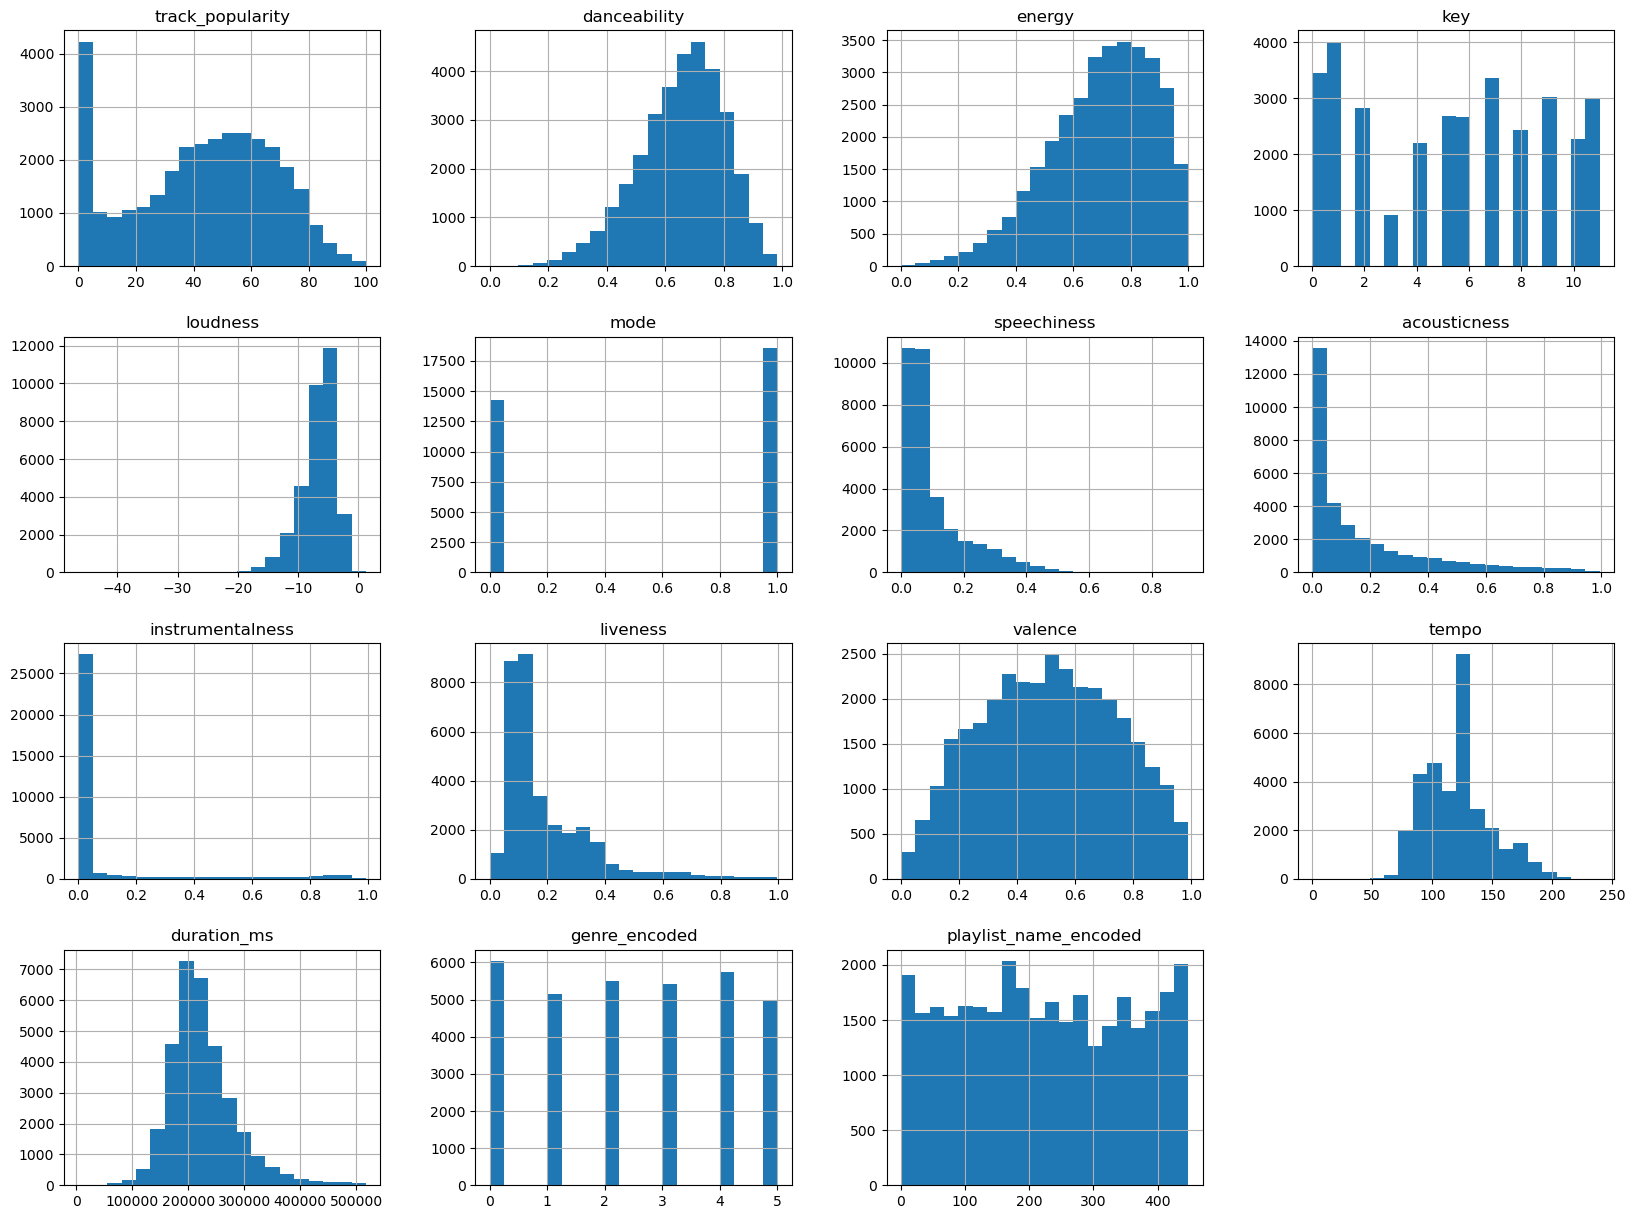

In [29]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

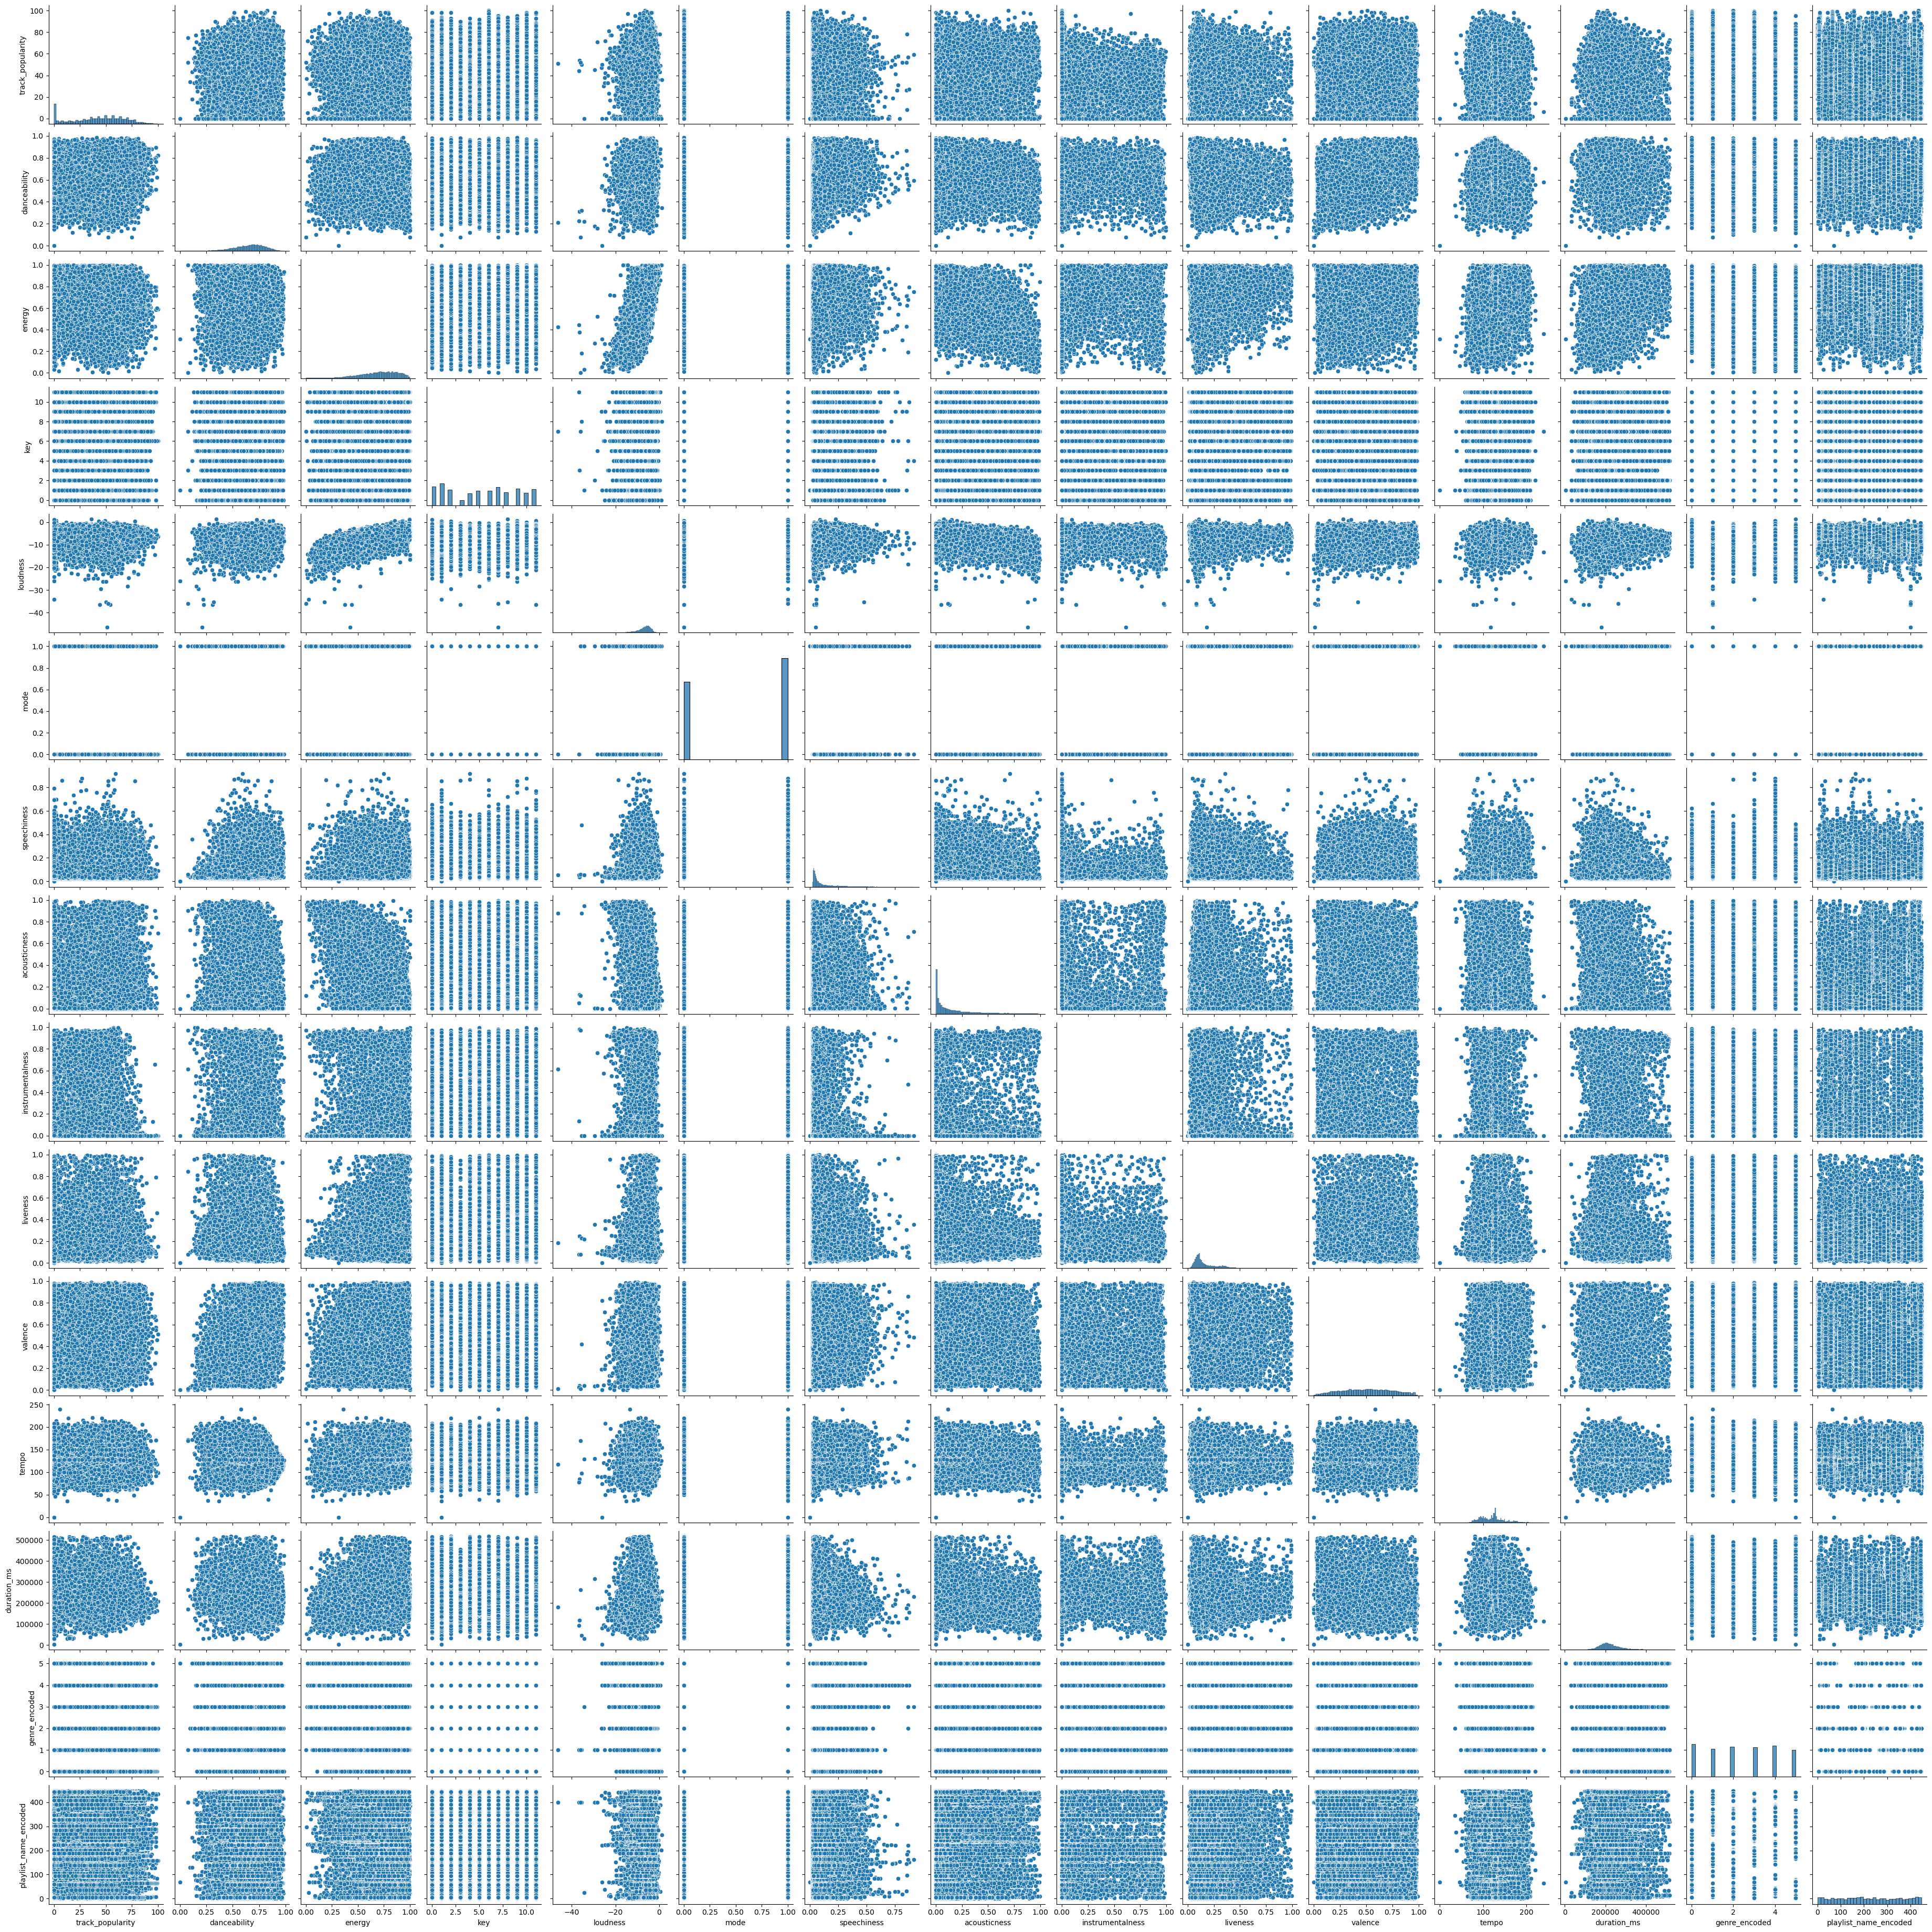

In [46]:
sns.pairplot(df)
plt.show()

# Correlation matrix

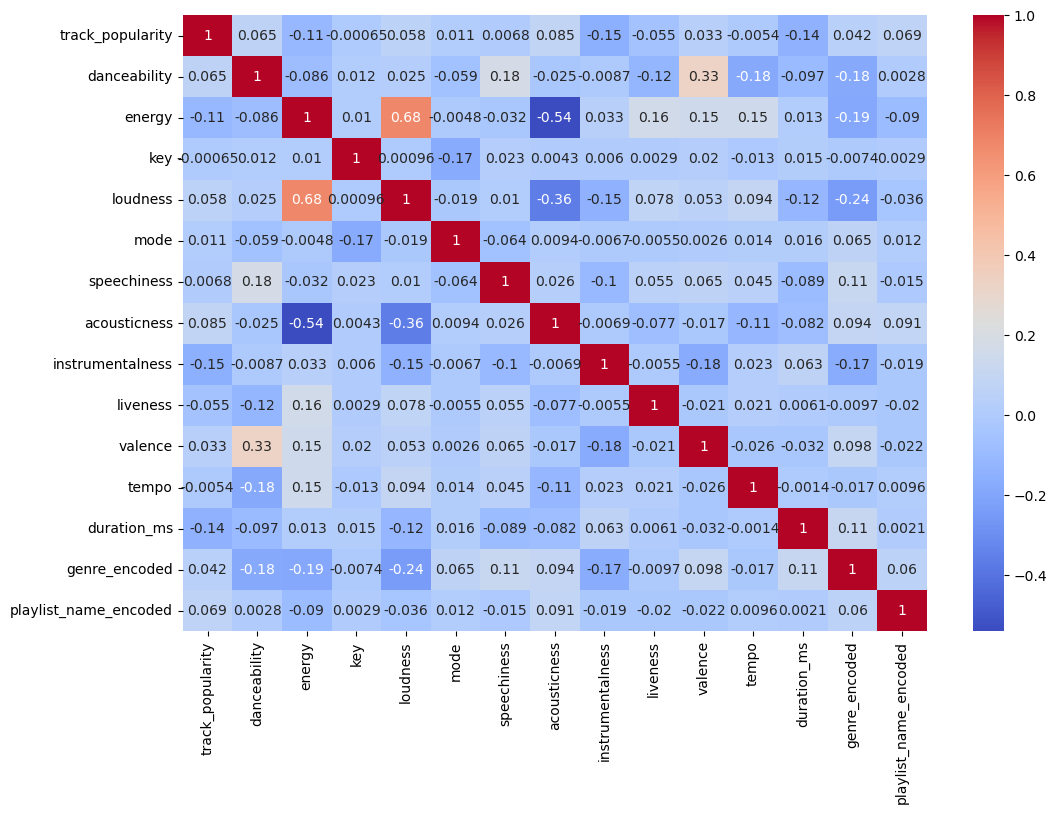

In [52]:
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [47]:
#Excluding non-numeric valued columns

X = df.drop(['genre_encoded', 'playlist_name_encoded', 'track_id', 'track_name', 'track_artist'], axis=1)
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns: {non_numeric_cols}")
    X = X.drop(non_numeric_cols, axis=1)
    print(X.dtypes)

Non-numeric columns: Index(['track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_id', 'playlist_subgenre'],
      dtype='object')
track_popularity      int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object


In [57]:
# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering

In [59]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['principal_component_1', 'principal_component_2'])

In [63]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

pca_df['cluster'] = clusters

score = silhouette_score(X_pca, clusters)
print("Silhouette Score: ", score)


Silhouette Score:  0.34134207098709857


# Plotting clusters

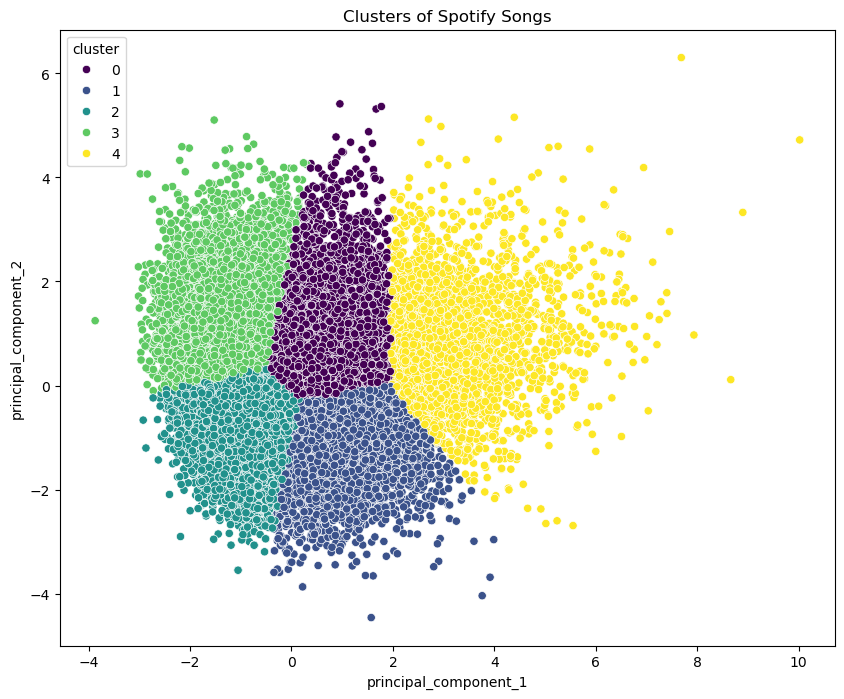

In [68]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clusters of Spotify Songs')
plt.show()

# Model to recommend songs

In [72]:
def recommend_songs(song_index, num_recommendations=5):
    cluster_label = pca_df.iloc[song_index]['cluster']
    similar_songs = pca_df[pca_df['cluster'] == cluster_label].index
    similar_songs = similar_songs.drop(song_index)  # Exclude the input song itself
    recommendations = np.random.choice(similar_songs, num_recommendations, replace=False)
    return recommendations

In [80]:
# Example usage: Recommend 5 songs similar to the first song in the dataset
recommended_indices = recommend_songs(0, 5)
print("Recommended Songs Indices: ", recommended_indices)


Recommended Songs Indices:  [ 2384 20177 21696 29525 27648]


In [76]:
print("Final Cluster Labels: ", pca_df['cluster'].unique())
print("Silhouette Score: ", score)


Final Cluster Labels:  [2 3 1 0 4]
Silhouette Score:  0.34134207098709857
